In [ ]:
# Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Dataset for Bitoin Price
from google.colab import files
files.upload()

In [ ]:
dataset = pd.read_csv('BTC-USD.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21086.792969,21152848261
1,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,22676.552734,28799154319
2,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,32442278429
3,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,24746386230
4,2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,22934.431641,26518700512
...,...,...,...,...,...,...,...
361,2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558
362,2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,43154.945313,24062872740
363,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,20851232595
364,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,25218357242


In [ ]:
dataset.shape

(366, 7)

In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,30094.720757,30605.395471,29642.723019,30152.909863,30152.909863,1.882033e+10
std,6260.313831,6404.401085,6096.579485,6269.950188,6269.950188,9.093489e+09
min,20187.876953,20370.595703,19628.253906,20187.244141,20187.244141,5.331173e+09
25%,26303.238282,26685.958984,25913.203125,26329.301758,26329.301758,1.231499e+10
50%,28172.476563,28629.719726,27700.732422,28188.646485,28188.646485,1.643088e+10
75%,30705.693848,31442.424316,30328.634765,30757.053711,30757.053711,2.379027e+10
max,46987.640625,48969.371094,45678.644531,46970.503906,46970.503906,5.462223e+10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


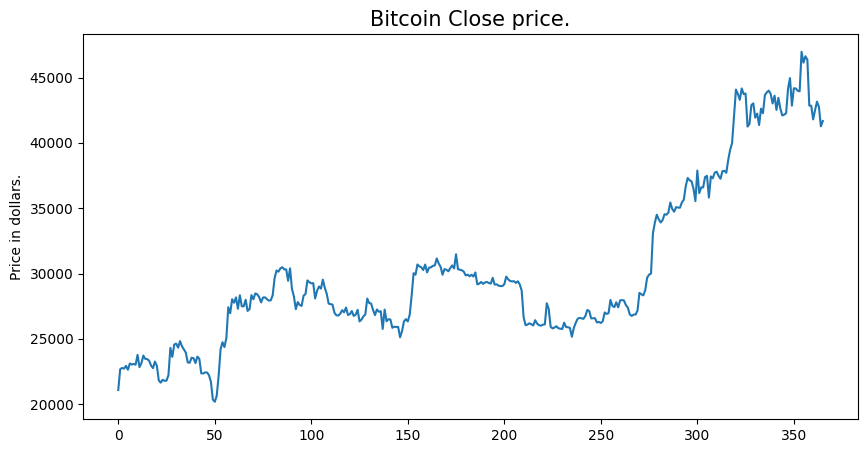

In [ ]:
#Exploratory Data Analysis
plt.figure(figsize=(10, 5))
plt.plot(dataset['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
dataset[dataset['Close'] == dataset['Adj Close']].shape, dataset.shape

((366, 7), (366, 7))

In [ ]:
dataset = dataset.drop(['Adj Close'], axis=1)

In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

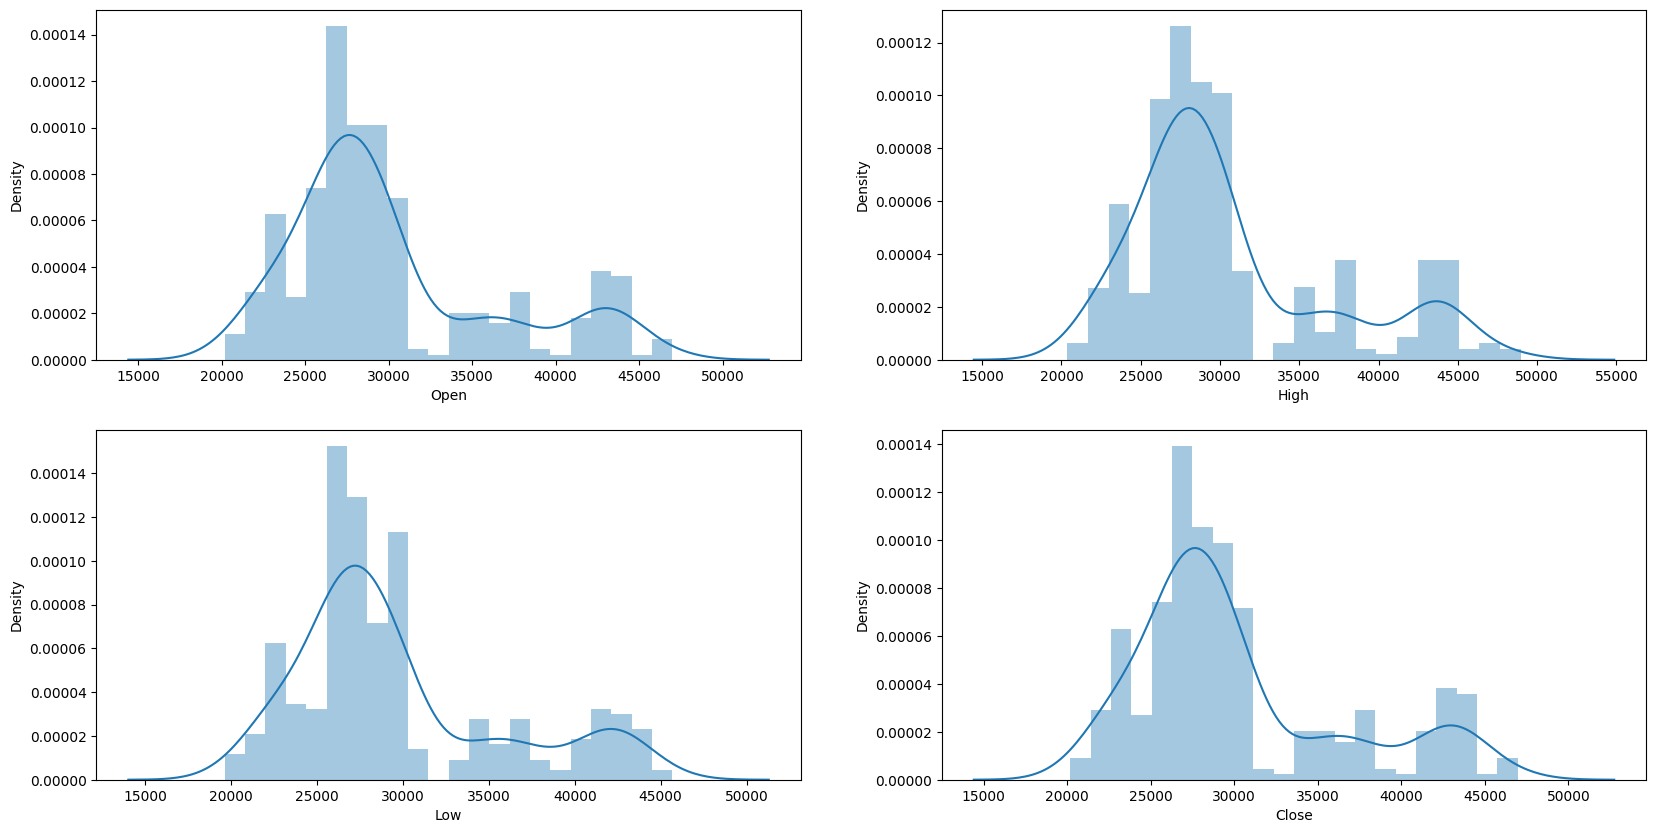

In [ ]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(dataset[col])
plt.show()

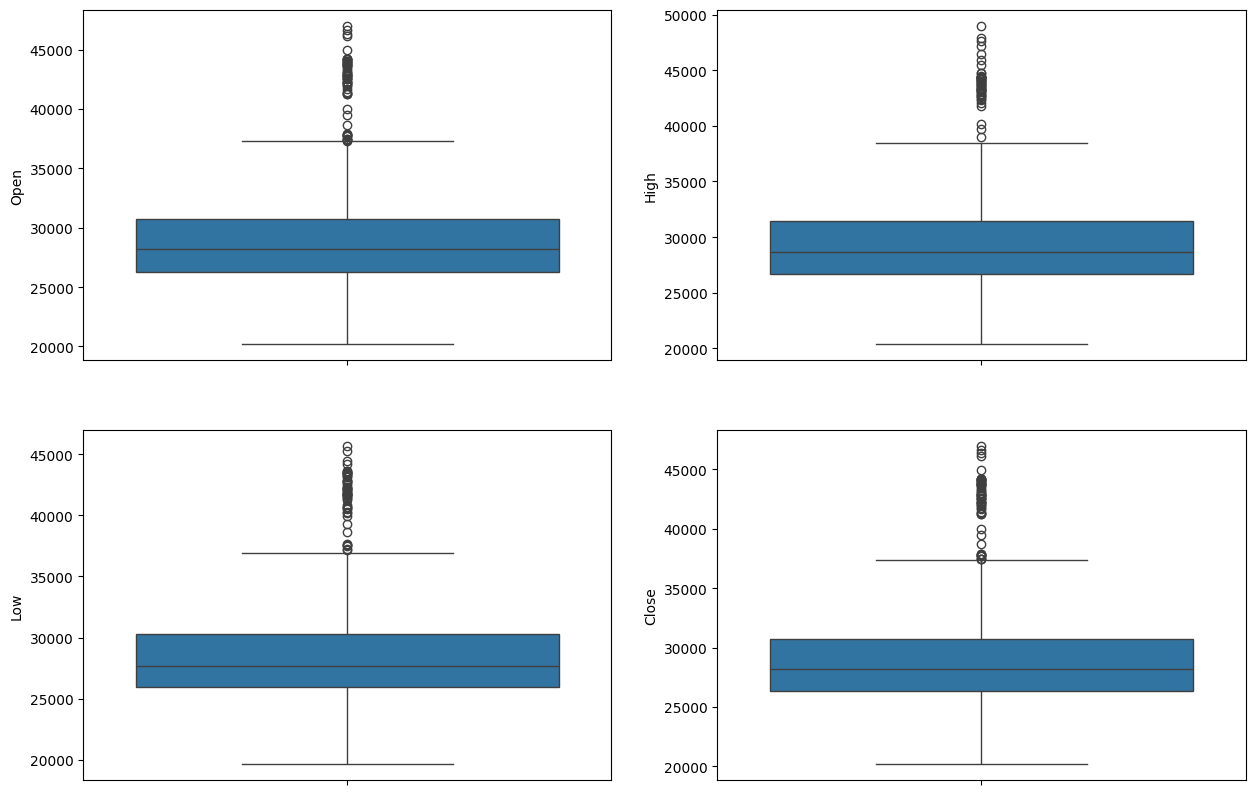

In [ ]:
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(dataset[col])
plt.show()

In [ ]:
#Feature Engineering help increase performance of the model
splitted = dataset['Date'].str.split('-', expand=True)

dataset['year'] = splitted[0].astype('int')
dataset['month'] = splitted[1].astype('int')
dataset['day'] = splitted[2].astype('int')

dataset.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21152848261,2023,1,19
1,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,28799154319,2023,1,20
2,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,32442278429,2023,1,21
3,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,24746386230,2023,1,22
4,2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,26518700512,2023,1,23


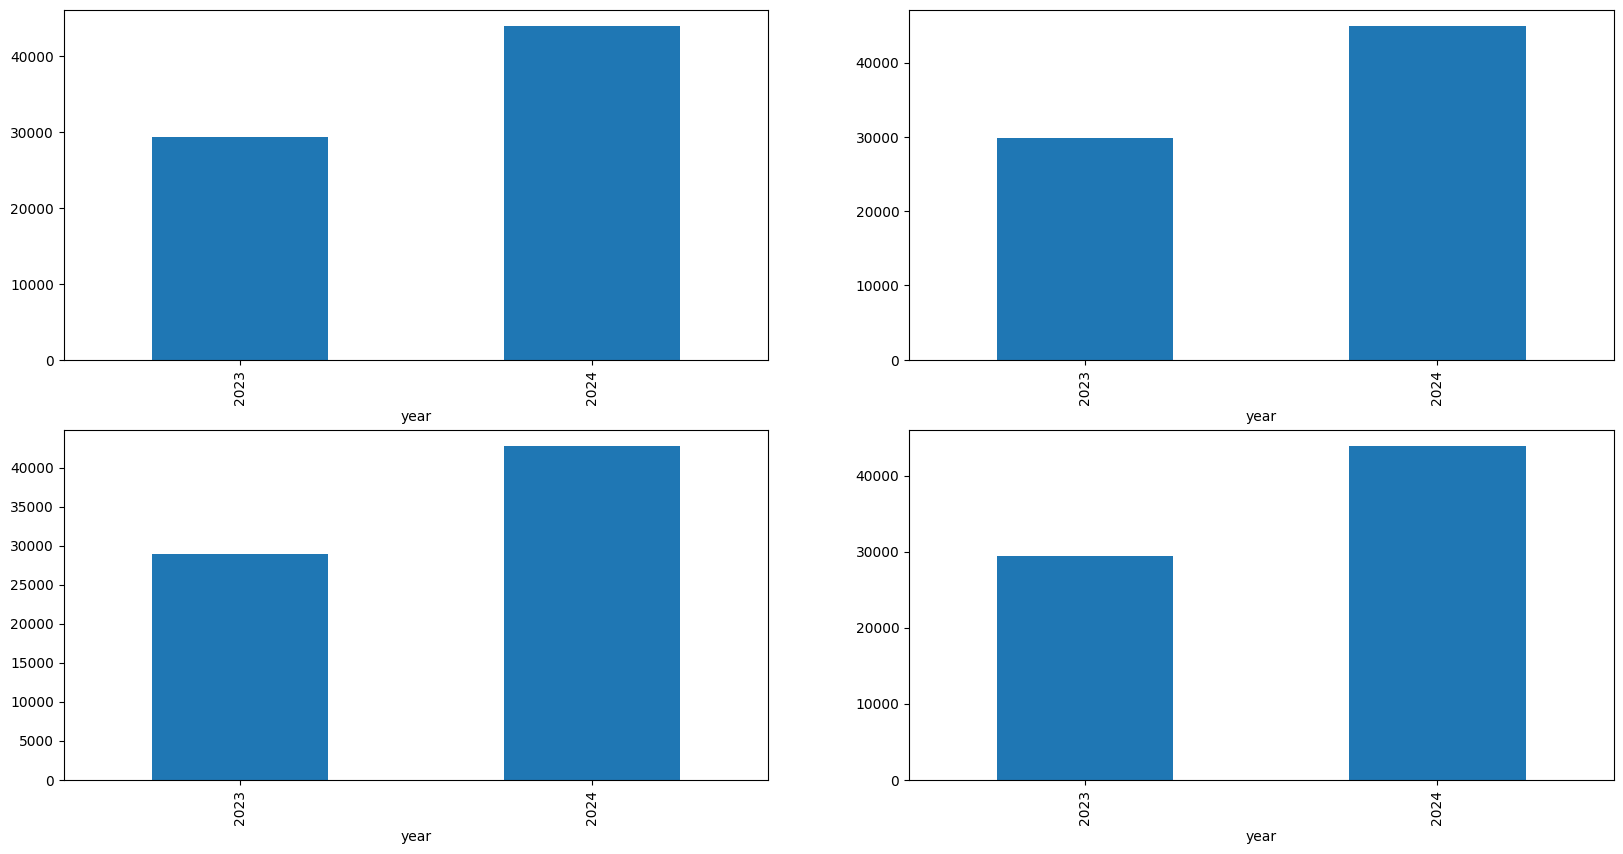

In [ ]:
data_grouped = dataset.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
dataset['is_quarter_end'] = np.where(dataset['month']%3==0,1,0)
dataset.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21152848261,2023,1,19,0
1,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,28799154319,2023,1,20,0
2,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,32442278429,2023,1,21,0
3,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,24746386230,2023,1,22,0
4,2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,26518700512,2023,1,23,0


In [ ]:
dataset['open-close'] = dataset['Open'] - dataset['Close']
dataset['low-high'] = dataset['Low'] - dataset['High']
dataset['target'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

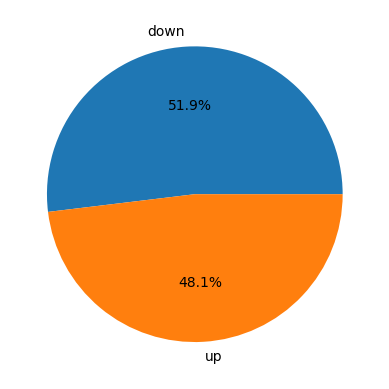

In [ ]:
plt.pie(dataset['target'].value_counts().values,
        labels=["down", "up"], autopct='%1.1f%%')
plt.show()

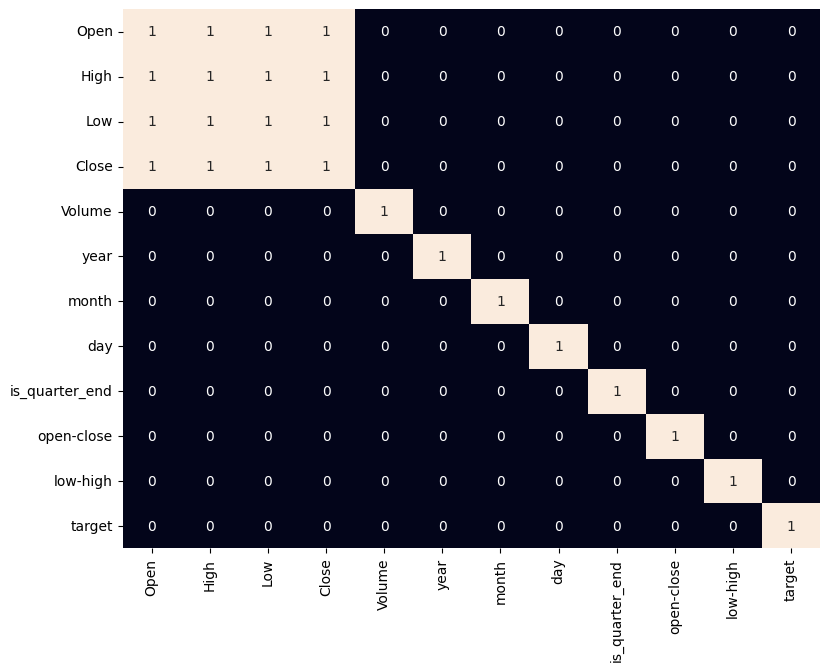

In [ ]:
plt.figure(figsize=(9, 7))

# correlated features only so, we will visualize
sb.heatmap(dataset.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = dataset[['open-close', 'low-high', 'is_quarter_end']]
target = dataset['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(329, 3) (37, 3)


In [ ]:
#Model Development and Evaluation
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5965106823390256
Validation Accuracy :  0.3322981366459627

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5825755895616175
Validation Accuracy :  0.406832298136646

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

In [ ]:
print('\n\n0 : Goes up')
print('1 : Goes down')
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()